$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 2$
---
Fill in your name, surname and group...
---

# 2.1 Load Fashion MNIST dataset
The following code loads Fashion MNIST dataset. [More information about the dataset](https://github.com/zalandoresearch/fashion-mnist)

We will concatnetate training and test sets to make an own split.

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
# X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=X/255


Display a few dozen of images

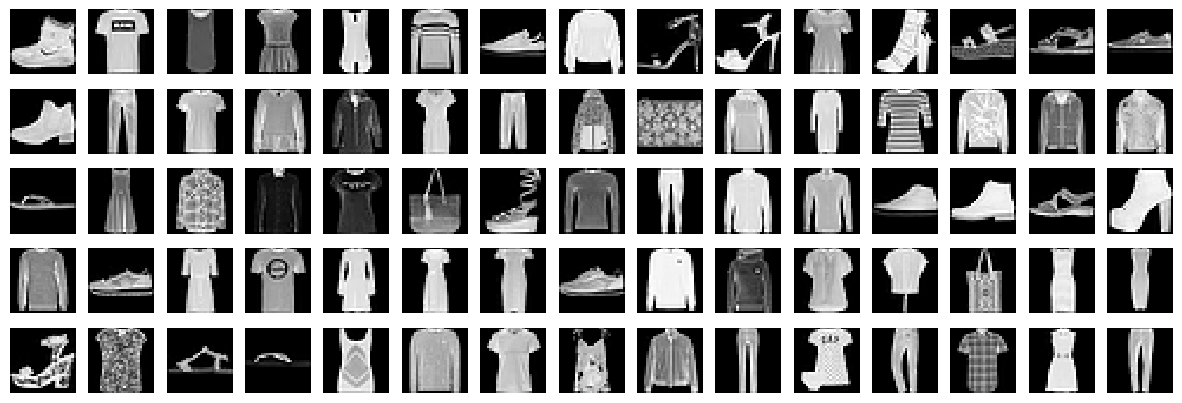

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
col2 = 15
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(X[index2]) # index of the sample image
plt.show()

**TODO 2.1.1** Print number of classes and the shape (dimensions) of the data

In [3]:
print(f' #classes = {len(np.unique(y_test))}, shape = {X.shape}')

 #classes = 10, shape = (70000, 28, 28)


## Subset selection
We select a subset comprising only two classes, namely t-shirts/tops and trousers

In [4]:
X2 = X[(y==0) | (y==1)]
y2=y[(y==0) | (y==1)]

**TODO 2.1.2** Print number of classes and the shape (dimensions) of the data

In [5]:
print(f' #classes = {len(np.unique(y2))}, shape = {X2.shape}')

 #classes = 2, shape = (14000, 28, 28)


**TODO 2.1.3** Display images from X2

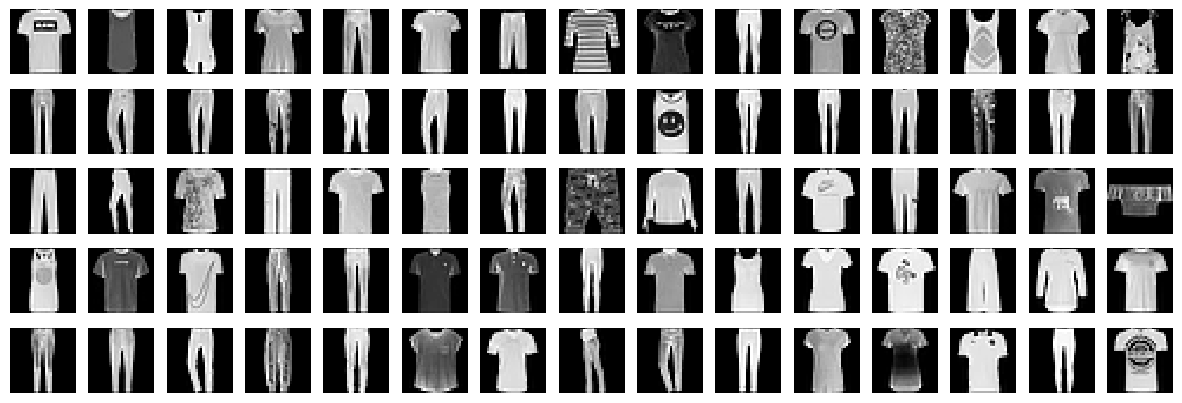

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
col2 = 15
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(X2[index2]) # index of the sample image
plt.show()

## Flatten images

In [7]:
X2=X2.reshape(X2.shape[0],-1)

**TODO 2.1.4** Print the shape of X2 after flattening

In [8]:
print(f' #classes = {y2.max()+1}, shape = {X2.shape}')

 #classes = 2, shape = (14000, 784)


## Train / test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# 2.2 Binary classification
*  Build a model
*  Compile (use binary_crossentropy as the loss function)
*  Fit the training data, set epochs=10
*  Display training history

In [10]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
74/74 [==============================] - 4s 8ms/step - loss: 0.2132 - accuracy: 0.9325
Epoch 2/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0617 - accuracy: 0.9809
Epoch 3/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0459 - accuracy: 0.9845
Epoch 4/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 5/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.9869
Epoch 6/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9890
Epoch 7/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0305 - accuracy: 0.9898
Epoch 8/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9913
Epoch 9/10
74/74 [==============================] - 1s 8ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 10/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9926


In [13]:
for k in hist.history:
  print(k)

loss
accuracy


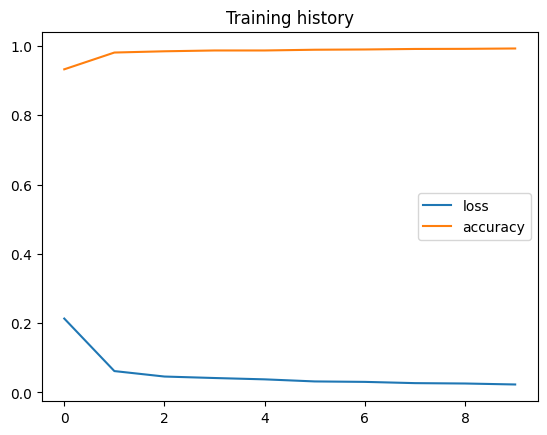

In [14]:
plt.title('Training history')
for k in hist.history:
  plt.plot(hist.history[k],label=k)
plt.legend()


## What is the performance of our classifier?



### Testing on the training set

Collect the model predictions

In [15]:
probs = model.predict(X_train)
print(probs.shape)
probs

294/294 [==============================] - 1s 3ms/step
(9380, 1)


array([[9.9992406e-01],
       [2.7023444e-07],
       [1.5190043e-04],
       ...,
       [9.3369824e-01],
       [2.4540856e-04],
       [1.2890826e-05]], dtype=float32)

We prefer a flat vector

In [16]:
# probs = model.predict(X_train)[:,0]
# probs
# or
probs=probs.flatten()
probs

array([9.9992406e-01, 2.7023444e-07, 1.5190043e-04, ..., 9.3369824e-01,
       2.4540856e-04, 1.2890826e-05], dtype=float32)

Compute labels

In [17]:
y_pred = np.where(probs>.5,1,0)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

How to check results?

In [18]:
pairs = zip(y_train,y_pred)
for i,p in enumerate(pairs):
  if i>30:break
  print(p)

(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)


Or load it to Pandas, then it can be converted to a fully browseable data table (use the magic wand on the right)

In [19]:
import pandas as pd
df = pd.DataFrame(zip(y_train,y_pred))
df.head(df.size)

,0,1
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
9375,1,1
9376,1,1
9377,1,1
9378,0,0


However, we need a measure - a single number describing similarity of predictions and known labels

**TODO 2.2.0** Compute this: $m=\frac{1}{n} \sum _{i=1}^n abs(y_{train}[i]-y_{pred}[i])$

In [20]:
m = sum(abs(y_train-y_pred))/len(y_train)
print(f'm={m} 1-m={1-m}')

m=0.006609808102345416 1-m=0.9933901918976545


and compute accuracy. Compare results

In [21]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_train)
print(f'accuracy={acc}')

accuracy=0.9933901918976545


Compute the **confusion matrix**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_train, y_pred)
matrix

array([[4662,   18],
       [  44, 4656]])

Useful function (small adaptation)

In [23]:
import seaborn as sns
from sklearn import metrics

LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS[0:num_classes],
                yticklabels=LABELS[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [24]:
y_pred = np.where(probs>.5,1,0)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

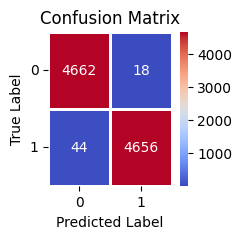

In [25]:
show_confusion_matrix(y_train, y_pred, 2)

In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4680
           1       1.00      0.99      0.99      4700

    accuracy                           0.99      9380
   macro avg       0.99      0.99      0.99      9380
weighted avg       0.99      0.99      0.99      9380



Exact formuls for classification scores are given [here (in Polish) silde 14 and following](https://home.agh.edu.pl/~pszwed/wiki/lib/exe/fetch.php?media=med:med-w04.pdf)

### Validation on the test set

**TODO 2.2.1** Repat the steps above on the test set. Replace X_train by X_test, etc.

In [27]:
probs = model.predict(X_test)
probs = probs.flatten()
y_pred = np.where(probs>.5,1,0)
m = sum(abs(y_test-y_pred))/len(y_test)
print(f'm={m} 1-m={1-m}')

145/145 [==============================] - 1s 3ms/step
m=0.008658008658008658 1-m=0.9913419913419913


In [28]:
acc=accuracy_score(y_pred,y_test)
print(f'accuracy={acc}')

accuracy=0.9913419913419913


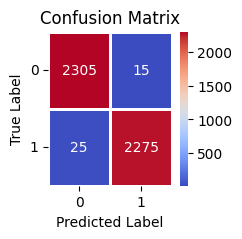

In [29]:
show_confusion_matrix(y_test, y_pred, 2)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2320
           1       0.99      0.99      0.99      2300

    accuracy                           0.99      4620
   macro avg       0.99      0.99      0.99      4620
weighted avg       0.99      0.99      0.99      4620



**TODO 2.2.2** supply X_test, y_test as validation data, fit the model and display plots

Epoch 1/10
74/74 [==============================] - 2s 27ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0403 - val_accuracy: 0.9870
Epoch 2/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 3/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.9935 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 4/10
74/74 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.0627 - val_accuracy: 0.9784
Epoch 5/10
74/74 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 6/10
74/74 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0287 - val_accuracy: 0.9926
Epoch 7/10
74/74 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoch 8/10
74/74 [

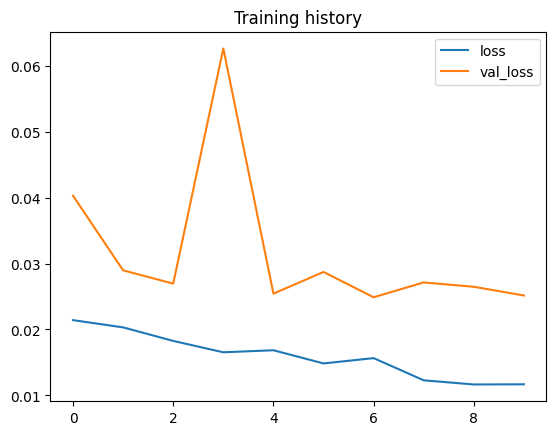

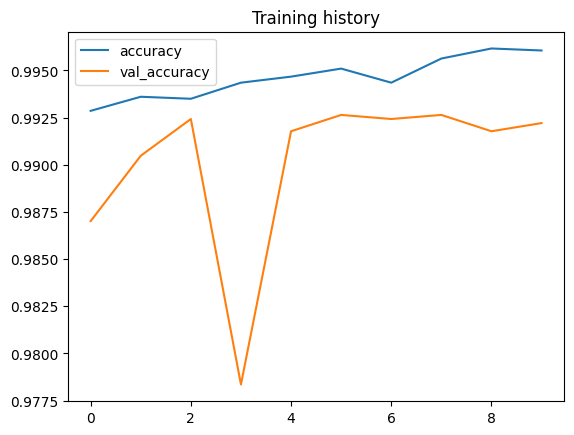

In [31]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test, y_test))
plt.title('Training history')
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.title('Training history')
plt.plot(hist.history["accuracy"],label="accuracy")
plt.plot(hist.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

#2.3 Binary classification on brest cancer dataset

The information on the dataset can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [32]:
from sklearn.datasets import load_breast_cancer

# X,y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**TODO 2.3.1** Repeat the previous steps for to process the loaded data
*  Create a model
*  fit it setting epochs=100 and supplying validation data
*  plot training history
*  obtain predictions
*  display confussion matrix
*  and print the classification report

**Caveat** we seed everything possible to create reproducible results

In [33]:
# import os
# import random
# def set_seeds(seed=1):
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     random.seed(seed)
#     tf.random.set_seed(seed)
#     np.random.seed(seed)

# set_seeds(42)

In [34]:
# import tensorflow as tf
# from keras import models
# from keras import layers
# tf.random.set_seed(1)

# model = models.Sequential()
# model.add(layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(layers.Dense(4, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
# use loss='binary_crossentropy'
# model.compile(optimizer='rmsprop',loss='binary_crossentropy' ,metrics=['accuracy'])


In [36]:
# epochs=100, batch_size=y_train.shape[0], use validation data
# hist = model.fit(X_train, y_train, epochs = 100, batch_size = y_train.shape[0], validation_data = (X_test, y_test))

In [37]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape

scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)


model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.8819 - accuracy: 0.5050 - val_loss: 0.8225 - val_accuracy: 0.4678
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.8046 - accuracy: 0.5528 - val_loss: 0.7445 - val_accuracy: 0.5205
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7362 - accuracy: 0.6080 - val_loss: 0.6775 - val_accuracy: 0.5731
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.6432 - val_loss: 0.6176 - val_accuracy: 0.6433
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.6834 - val_loss: 0.5664 - val_accuracy: 0.6725
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.7161 - val_loss: 0.5221 - val_accuracy: 0.7485
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.7337 - val_loss: 0.4845 - val_accuracy: 0.7778
Epoch 8/100


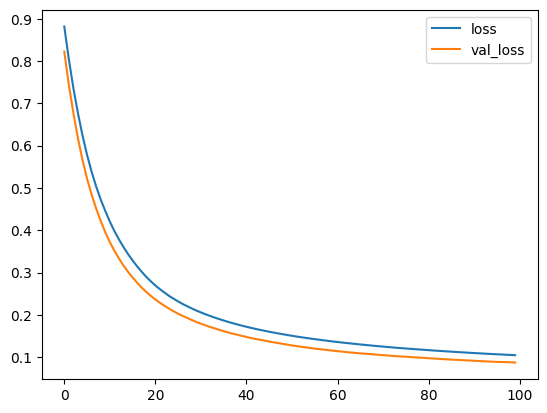

In [38]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

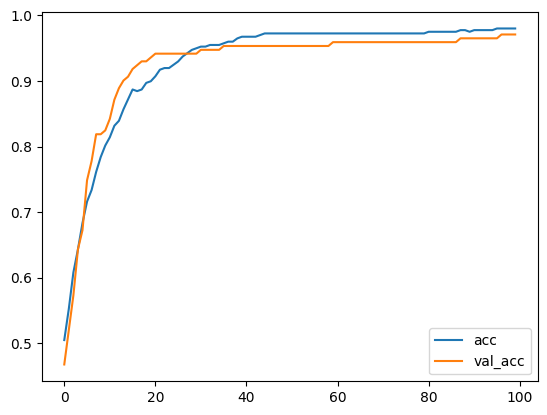

In [39]:
plt.plot(hist.history['accuracy'],label='acc')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.legend()

In [40]:
probs = model.predict(X_train).flatten()
y_pred = np.where(probs<.5, 0, 1)

13/13 [==============================] - 0s 2ms/step


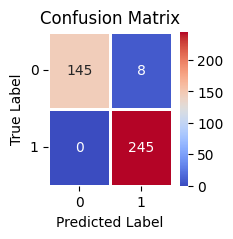

In [41]:
show_confusion_matrix(y_train, y_pred, 2)

In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       153
           1       0.97      1.00      0.98       245

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



# 2.4 Model \#output neurons = \#classes

We reload Fashion MNIST data... This may be skipped

In [43]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
# X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=X/255

X2 = X[(y==0) | (y==1)]
y2=y[(y==0) | (y==1)]
X2=X2.reshape(X2.shape[0],-1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

We create a neural net with two neurons in the output layer and softmax activation function. As the loss, sparse_categorical_crossentropy is used,
$\sum_{i=1}^k y_i\cdot ln(p_i)$

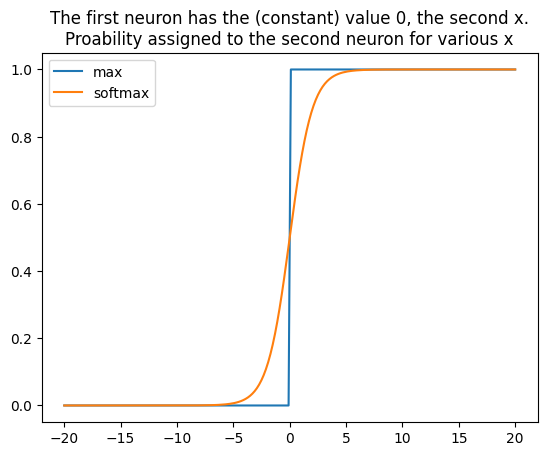

In [45]:
# softmax slects a neuron with the highest probability value
# but it is smooth and differentiable


x=np.linspace(-20,20,200)
zeros = x*0
X=np.stack((zeros,x),axis=-1)

plt.title("The first neuron has the (constant) value 0, the second x.\nProability assigned to the second neuron for various x")
plt.plot(x,np.argmax(X,axis=1),label='max')
plt.plot(x,np.exp(X[:,1])/((np.exp(X[:,0])+np.exp(X[:,1]))),label='softmax')
plt.legend()


In [46]:
from keras import models
from keras import layers


num_classes = y_train.max()+1

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(num_classes, activation='softmax'))
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
hist = network.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
74/74 [==============================] - 1s 3ms/step - loss: 0.1298 - accuracy: 0.9490
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9821
Epoch 3/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9865
Epoch 4/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9899
Epoch 5/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9909
Epoch 6/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9924
Epoch 7/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9928
Epoch 8/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9929
Epoch 9/10
74/74 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 10/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9961


Get output probabilities

In [48]:
probs = network.predict(X_test)

145/145 [==============================] - 0s 2ms/step


And load them to a data frame

In [49]:
import pandas as pd

df = pd.DataFrame(probs)
df.head(df.size)

,0,1
0,1.000000e+00,1.413748e-08
1,1.000000e+00,7.434770e-09
2,9.199717e-09,1.000000e+00
3,1.000000e+00,2.407749e-16
4,4.873251e-11,1.000000e+00
...,...,...
4615,4.938610e-08,1.000000e+00
4616,1.891579e-10,1.000000e+00
4617,1.336568e-05,9.999866e-01
4618,1.000000e+00,4.618108e-12


Determine predicted labels as arg_max (computed horizontally)

In [50]:
y_pred = np.argmax(probs,axis=1)

Display confusion matrix and classification report

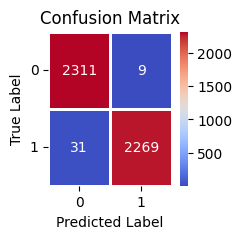

In [51]:
show_confusion_matrix(y_test, y_pred, 2)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2320
           1       1.00      0.99      0.99      2300

    accuracy                           0.99      4620
   macro avg       0.99      0.99      0.99      4620
weighted avg       0.99      0.99      0.99      4620



# 2.5 Build a model for all ten fashion classes

In [53]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);

X=X/255

X=X.reshape(X.shape[0],-1)

In [54]:
from sklearn.model_selection import train_test_split
data = fashion_mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**TODO 2.5.1** Use the same model configuration, but adapt it to appropriate number of classes

In [55]:
from keras import models
from keras import layers

num_classes = len(np.unique(y_train))
# create a model add layers, compile
modelnet = tf.keras.models.Sequential()
modelnet.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
modelnet.add(layers.Dense(40, activation='relu'))
modelnet.add(layers.Dense(num_classes, activation='softmax'))
modelnet.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fit the model

In [56]:
hist = modelnet.fit(X_train, y_train, epochs=10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5924 - accuracy: 0.7876 - val_loss: 0.4293 - val_accuracy: 0.8475
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4135 - accuracy: 0.8494 - val_loss: 0.3870 - val_accuracy: 0.8592
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3646 - accuracy: 0.8663 - val_loss: 0.4689 - val_accuracy: 0.8294
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3361 - accuracy: 0.8762 - val_loss: 0.3445 - val_accuracy: 0.8754
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3150 - accuracy: 0.8827 - val_loss: 0.3445 - val_accuracy: 0.8771
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3025 - accuracy: 0.8878 - val_loss: 0.3143 - val_accuracy: 0.8854
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2857 - accuracy: 0.8947 - val_loss: 0.3194 - val_accuracy: 0.8836
Epoch 

Make predictions

In [57]:
probs = modelnet.predict(X_test)
print(f'Probs shape={probs.shape}')
y_pred = np.argmax(probs,axis=1)

722/722 [==============================] - 1s 2ms/step
Probs shape=(23100, 10)


Show confusion matrix and scores (classification report)

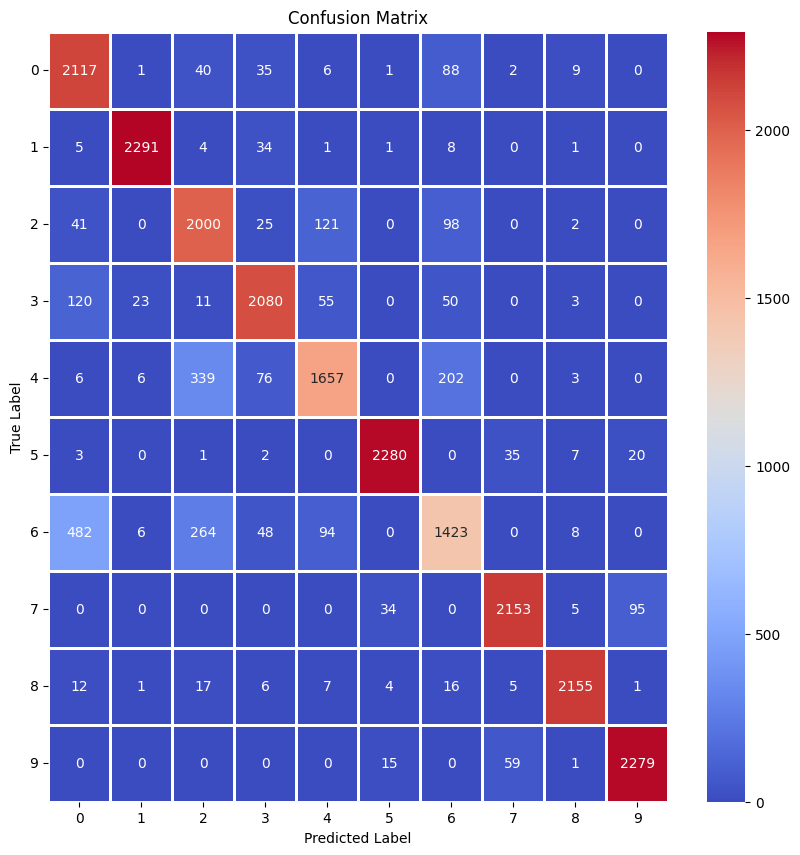

In [58]:
show_confusion_matrix(y_test, y_pred, 10)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      2299
           1       0.98      0.98      0.98      2345
           2       0.75      0.87      0.81      2287
           3       0.90      0.89      0.90      2342
           4       0.85      0.72      0.78      2289
           5       0.98      0.97      0.97      2348
           6       0.75      0.61      0.68      2325
           7       0.96      0.94      0.95      2287
           8       0.98      0.97      0.98      2224
           9       0.95      0.97      0.96      2354

    accuracy                           0.88     23100
   macro avg       0.89      0.88      0.88     23100
weighted avg       0.89      0.88      0.88     23100



**TODO 2.5.2** Analyze the results. Which fashion classes are wrongly classified. Can you explain that by similarity of forms?


In [60]:
# Many of 0, 2 and 4 is bad classified because this
# is T-shirt/top, Pullover and Coat which ones is very similar

# 2.6 Analyze the iris dataset

You can find the dataset description [here](https://archive.ics.uci.edu/ml/datasets/iris)

**TODO 2.6.1** Implement the following steps
*  First load  data (code provided)
*  Create a neural network comprising one hidden layer with 4 units
*  Experimentaly establish the number of epochs during training.
*  Provide validation data
*  Display loss/validation loss and accuracies
*  Predict output labels
*  Display the confussion matrix and scores

In [61]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# Build the model

from keras import models
from keras import layers

num_classes = len(np.unique(y_train))
modeliris = tf.keras.models.Sequential()
modeliris.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
modeliris.add(layers.Dense(4, activation='relu'))
modeliris.add(layers.Dense(3, activation='softmax'))
modeliris.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

modeliris.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                50        
                                                                 
 dense_11 (Dense)            (None, 4)                 44        
                                                                 
 dense_12 (Dense)            (None, 3)                 15        
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
#train

hist = modeliris.fit(X_train, y_train, batch_size=50, validation_data=(X_test,y_test), epochs=150)

Epoch 1/150
2/2 [==============================] - 1s 169ms/step - loss: 1.3685 - accuracy: 0.3400 - val_loss: 1.2940 - val_accuracy: 0.3200
Epoch 2/150
2/2 [==============================] - 0s 28ms/step - loss: 1.3193 - accuracy: 0.3400 - val_loss: 1.2644 - val_accuracy: 0.3200
Epoch 3/150
2/2 [==============================] - 0s 25ms/step - loss: 1.2872 - accuracy: 0.3400 - val_loss: 1.2419 - val_accuracy: 0.3200
Epoch 4/150
2/2 [==============================] - 0s 25ms/step - loss: 1.2625 - accuracy: 0.3400 - val_loss: 1.2238 - val_accuracy: 0.3200
Epoch 5/150
2/2 [==============================] - 0s 28ms/step - loss: 1.2415 - accuracy: 0.3400 - val_loss: 1.2078 - val_accuracy: 0.3200
Epoch 6/150
2/2 [==============================] - 0s 26ms/step - loss: 1.2233 - accuracy: 0.3400 - val_loss: 1.1938 - val_accuracy: 0.3200
Epoch 7/150
2/2 [==============================] - 0s 28ms/step - loss: 1.2072 - accuracy: 0.3400 - val_loss: 1.1817 - val_accuracy: 0.3200
Epoch 8/150
2/2 [==

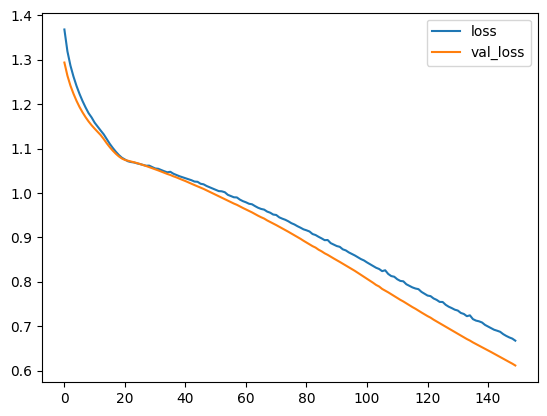

In [64]:
#plot loss
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.legend()

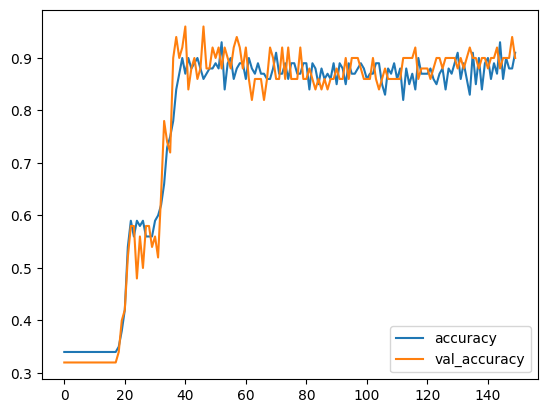

In [65]:
#Plot accuracy
plt.plot(hist.history["accuracy"], label = "accuracy")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy")
plt.legend()

In [66]:
# Make predictions
probs = modeliris.predict(X_test)
y_pred = np.argmax(probs,axis=1)

2/2 [==============================] - 0s 5ms/step


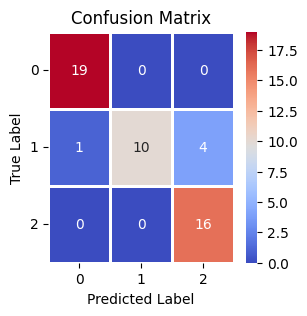

In [67]:
# Confussion matrix
show_confusion_matrix(y_test, y_pred, 3)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.67      0.80        15
           2       0.80      1.00      0.89        16

    accuracy                           0.90        50
   macro avg       0.92      0.89      0.89        50
weighted avg       0.92      0.90      0.89        50

